In [1]:
import pandas as pd
import numpy as np

In [2]:
## load the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
## Specification for "petal length" as a explanatory variable
X = iris["data"][:,3:]
## Specification for class label as the taget
y= iris["target"]
## Iris verginica will be given 1, elsewhat is 0
y =(iris["target"] == 2).astype(np.int64)

In [18]:
## logistic regression
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(solver="lbfgs", random_state=0)
log_reg.fit(X,y)

LogisticRegression(random_state=0)

In [24]:
##visualization
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000)
X_new = X_new.reshape([-1,1])
y_proba = log_reg.predict_proba(X_new)

/var/folders/lt/5fljh2_j2lvbn49nghf0j0pw0000gn/T/ipykernel_47792/1590578972.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica", color='g')
/var/folders/lt/5fljh2_j2lvbn49nghf0j0pw0000gn/T/ipykernel_47792/1590578972.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Virginica", color='b')


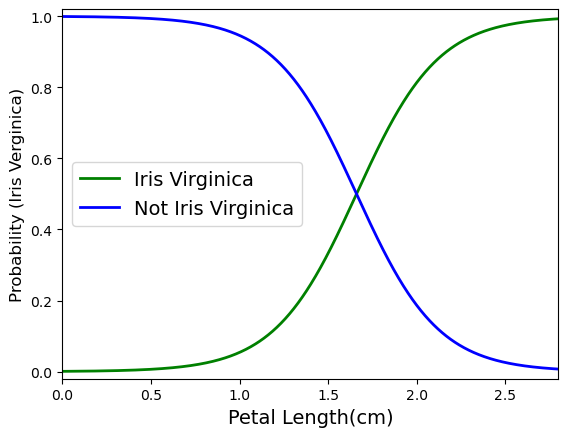

In [32]:
plt.axis([0, 2.8, -0.02,1.02])
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica", color='g')
plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Virginica", color='b')
plt.xlabel("Petal Length(cm)", fontsize=14)
plt.ylabel("Probability (Iris Verginica)", fontsize=12)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [33]:
##決定境界 decision boundary
decision_boundary=X_new[y_proba[:,1]>=0.5][0]

/var/folders/lt/5fljh2_j2lvbn49nghf0j0pw0000gn/T/ipykernel_47792/2876333194.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica", color='g')
/var/folders/lt/5fljh2_j2lvbn49nghf0j0pw0000gn/T/ipykernel_47792/2876333194.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Virginica", color='b')


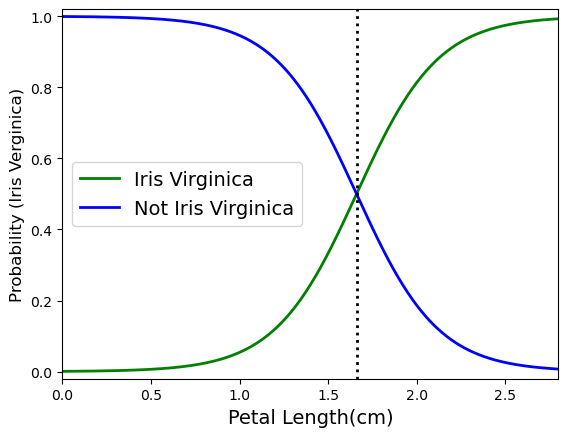

In [35]:
## plot with decision boundary
plt.axis([0, 2.8, -0.02,1.02])
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica", color='g')
plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Virginica", color='b')
plt.plot([decision_boundary,decision_boundary],[-1,2],"k:", linewidth=2)
plt.xlabel("Petal Length(cm)", fontsize=14)
plt.ylabel("Probability (Iris Verginica)", fontsize=12)
plt.legend(loc="center left", fontsize=14)
plt.show()